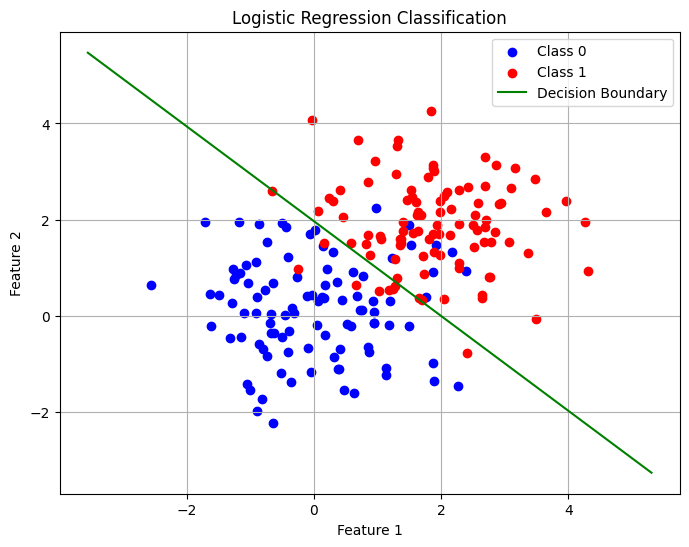

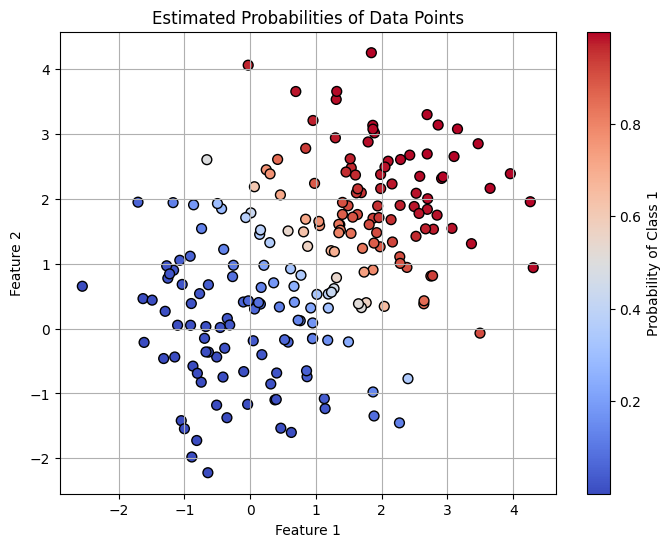

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data for binary classification
np.random.seed(0)
n_samples = 100

# Generate class 0 data (mean at [0, 0])
X0 = np.random.randn(n_samples, 2) + np.array([0, 0])
# Generate class 1 data (mean at [2, 2])
X1 = np.random.randn(n_samples, 2) + np.array([2, 2])

# Combine data and labels
X = np.vstack([X0, X1])
y = np.array([0] * n_samples + [1] * n_samples)

# 2. Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Extract model coefficients
coef = model.coef_[0]
intercept = model.intercept_[0]

# Decision boundary: coef[0]*x + coef[1]*y + intercept = 0 
# Solve for y: y = -(coef[0]*x + intercept) / coef[1]
x_values = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 200)
y_values = -(coef[0] * x_values + intercept) / coef[1]

# 4. Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Classification')
plt.legend()
plt.grid(True)
plt.show()

# 3. Predict probability for class 1 for each data point
probs = model.predict_proba(X)[:, 1]  # estimated probability for class 1

# 4. Plot the data points with estimated probabilities indicated by color
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=probs, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Estimated Probabilities of Data Points')
plt.grid(True)
cbar = plt.colorbar(scatter)
cbar.set_label('Probability of Class 1')
plt.show()


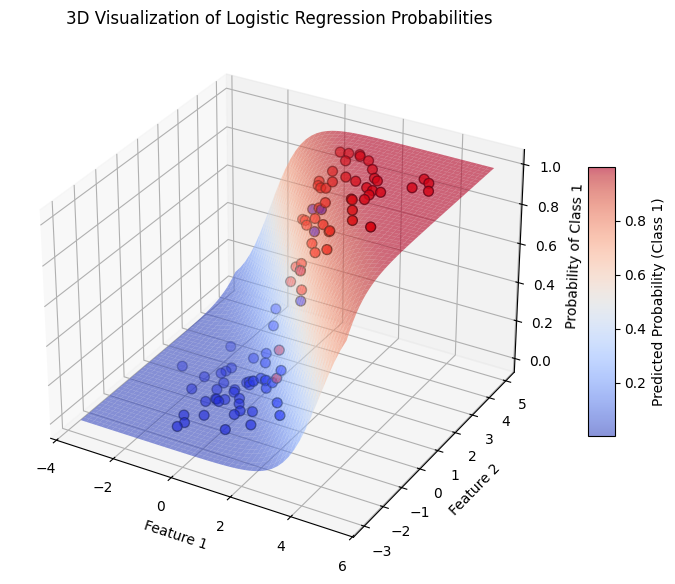

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data for binary classification
np.random.seed(0)
n_samples = 50

# Generate class 0 data (mean at [0, 0])
X0 = np.random.randn(n_samples, 2) + np.array([0, 0])
# Generate class 1 data (mean at [2, 2])
X1 = np.random.randn(n_samples, 2) + np.array([2, 2])

# Combine data and labels
X_data = np.vstack((X0, X1))
y_data = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# 2. Fit logistic regression model
model = LogisticRegression()
model.fit(X_data, y_data)

# 3. Create a grid of points covering the data range
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Flatten the grid to pass into the model
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 4. Predict probability for class 1 across the grid
probs_grid = model.predict_proba(grid_points)[:, 1]
Z = probs_grid.reshape(xx.shape)  # reshape back to 2D for plotting

# 5. Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 6. Plot the 3D surface of predicted probabilities
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.6, edgecolor='none')

# Optional: Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Predicted Probability (Class 1)')

# 7. Scatter the original data points in 3D
#    Z값은 각 포인트의 클래스 1 예측 확률로 매핑
probs_data = model.predict_proba(X_data)[:, 1]
ax.scatter(X_data[:, 0], X_data[:, 1], probs_data, 
           c=y_data, cmap='bwr', edgecolor='k', s=50)

# 8. Label axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Probability of Class 1')
ax.set_title('3D Visualization of Logistic Regression Probabilities')

plt.show()


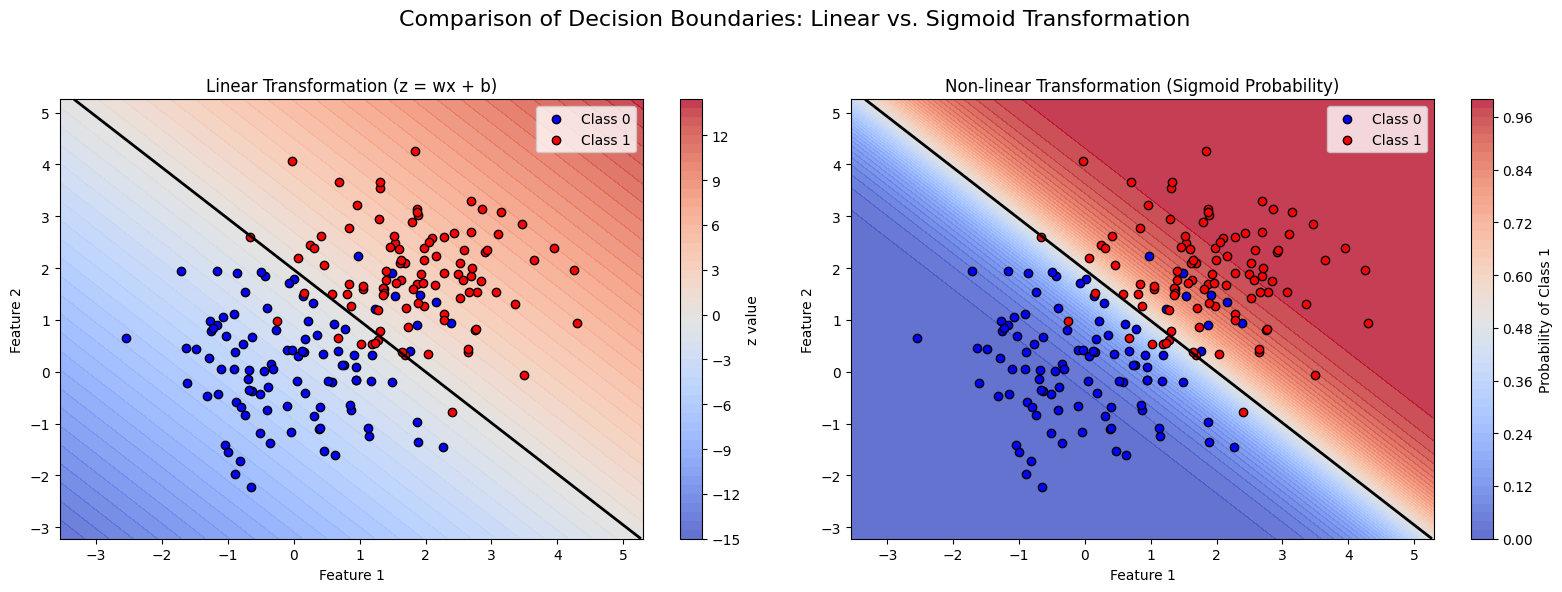

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data for binary classification
np.random.seed(0)
n_samples = 100
# Class 0: centered at (0, 0)
X0 = np.random.randn(n_samples, 2) + np.array([0, 0])
# Class 1: centered at (2, 2)
X1 = np.random.randn(n_samples, 2) + np.array([2, 2])
# Combine data and labels
X = np.vstack([X0, X1])
y = np.array([0]*n_samples + [1]*n_samples)

# 2. Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Create a grid of points covering the data range
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 4. Compute linear transformation (z = decision function) and sigmoid probability
# decision_function gives z = w*x + b
z_values = model.decision_function(grid_points).reshape(xx.shape)
# Compute probability using sigmoid: σ(z) = 1 / (1 + exp(-z))
prob_values = 1 / (1 + np.exp(-z_values))

# 5. Plotting: compare the contours of linear transformation and sigmoid output
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (A) Plot linear transformation (z values)
contour_lin = axes[0].contourf(xx, yy, z_values, levels=50, cmap='coolwarm', alpha=0.8)
# Decision boundary is where z = 0
axes[0].contour(xx, yy, z_values, levels=[0], colors='k', linewidths=2)
axes[0].scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0', edgecolor='k')
axes[0].scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1', edgecolor='k')
axes[0].set_title('Linear Transformation (z = wx + b)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
cbar_lin = fig.colorbar(contour_lin, ax=axes[0])
cbar_lin.set_label('z value')

# (B) Plot non-linear (sigmoid) transformation (probability values)
contour_prob = axes[1].contourf(xx, yy, prob_values, levels=50, cmap='coolwarm', alpha=0.8)
# Decision boundary is where probability = 0.5
axes[1].contour(xx, yy, prob_values, levels=[0.5], colors='k', linewidths=2)
axes[1].scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0', edgecolor='k')
axes[1].scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1', edgecolor='k')
axes[1].set_title('Non-linear Transformation (Sigmoid Probability)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
cbar_prob = fig.colorbar(contour_prob, ax=axes[1])
cbar_prob.set_label('Probability of Class 1')

plt.suptitle('Comparison of Decision Boundaries: Linear vs. Sigmoid Transformation', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


왼쪽은 선형결합만 한 것. 오른쪽은 거기에 비선형변환을 가한 것이다. 

<img src="image/스크린샷 2025-03-18 오후 8.25.52.png" width="700"/>

왼쪽과 오른쪽 모두 결정경계는 같게 나타난다. 둘 다 z = 0또는 p=0.5

왼쪽은 z가 음수에서 양수로 선형적으로 변화, 0을 기준으로 음수는 파란쪽, 양수는 붉은쪽에 가깝다. 

오른쪽은 p가 0~1범위에서 비선형적으로 변화, 경계 주변에서 색이 급격하게 변화하고 멀리가면 0 혹은 1에 가까워진다. 

<img src="image/스크린샷 2025-03-18 오후 8.32.35.png" width="700"/>